In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
students_data = pd.read_csv("student_engagement_data_10000.csv")

In [42]:
students_data.head()

,Student ID,Session ID,Date,EEG Data (PSD Features),Engagement Level,Attention Level,Internet Connectivity,Adaptivity Level,Learning Mode Prediction,Performance Metrics
0,1,183,2025-01-20,"[0.02336871035675725, 0.14892576656473, 0.4845...",High,High,High (Mobile/Wi-Fi),Moderate,Visual Learner,84
1,2,121,2025-01-20,"[0.3587673311624021, 0.8537981137219391, 0.420...",Low,High,Moderate (Wi-Fi),High,Auditory Learner,82
2,3,169,2025-01-10,"[0.7420744093003028, 0.9072353407615483, 0.122...",Moderate,High,Low (Mobile),Low,Auditory Learner,83
3,4,132,2025-01-20,"[0.5596059164442914, 0.4645215049524961, 0.062...",High,Moderate,Low (Mobile),Moderate,Visual Learner,66
4,5,190,2025-01-18,"[0.15041646487754368, 0.7331633184349893, 0.86...",High,High,High (Mobile/Wi-Fi),Moderate,Auditory Learner,93


# Exploratory Data Analysis (EDA)
1. Basic Summary Statistics
- Objective: Get an overview of the dataset.
- Tools: pandas



- Use .info() and .describe() to view data types and distributions

In [43]:
students_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Student ID                10000 non-null  int64 
 1   Session ID                10000 non-null  int64 
 2   Date                      10000 non-null  object
 3   EEG Data (PSD Features)   10000 non-null  object
 4   Engagement Level          10000 non-null  object
 5   Attention Level           10000 non-null  object
 6   Internet Connectivity     10000 non-null  object
 7   Adaptivity Level          10000 non-null  object
 8   Learning Mode Prediction  10000 non-null  object
 9   Performance Metrics       10000 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 781.4+ KB


In [44]:
students_data.describe()

,Student ID,Session ID,Performance Metrics
count,10000.00000,10000.000000,10000.000000
mean,5000.50000,149.762700,74.674300
std,2886.89568,28.783232,14.383404
min,1.00000,100.000000,50.000000
25%,2500.75000,125.000000,62.000000
50%,5000.50000,150.000000,75.000000
75%,7500.25000,174.000000,87.000000
max,10000.00000,199.000000,99.000000


- Count null or missing values in each column

In [45]:
students_data.isnull().sum()

Student ID                  0
Session ID                  0
Date                        0
EEG Data (PSD Features)     0
Engagement Level            0
Attention Level             0
Internet Connectivity       0
Adaptivity Level            0
Learning Mode Prediction    0
Performance Metrics         0
dtype: int64

- Value counts of categorical columns like learning_mode, student_id, etc.


In [46]:
students_data['Student ID'].value_counts()

Student ID
1        1
6671     1
6664     1
6665     1
6666     1
        ..
3334     1
3335     1
3336     1
3337     1
10000    1
Name: count, Length: 10000, dtype: int64

In [47]:
students_data['Learning Mode Prediction'].value_counts()

Learning Mode Prediction
Kinesthetic Learner    3374
Auditory Learner       3326
Visual Learner         3300
Name: count, dtype: int64

In [48]:
students_data['Engagement Level'].value_counts()

Engagement Level
Low         3366
Moderate    3357
High        3277
Name: count, dtype: int64

2. Daily Average Engagement and Attention
- Objective: Track how student attention/engagement varies daily.

- Tools: pandas, matplotlib.pyplot

- Tasks:


- Group by date and calculate average attention and engagement

In [49]:
#students_data['Date']= pd.to_datetime(students_data['Date'],errors = "coerce")
mapping1 = {'Low':1,'Moderate':2,'High':3}
students_data['Engagment_Num']=students_data['Engagement Level'].map(mapping1)
students_data['Attention_Num']=students_data["Attention Level"].map(mapping1)


Reverse_mapping = {1:'Low', 2:'Moderate', 3:'High'}

students_data['Engagment_label']=students_data['Engagment_Num'].map(Reverse_mapping)
students_data['Attention_label']=students_data["Attention_Num"].map(Reverse_mapping)

In [50]:
Calculate_average_Engagment = students_data.groupby("Date")['Engagment_Num'].mean().reset_index()
Calculate_average_Attention = students_data.groupby("Date")['Attention_Num'].mean().reset_index() 
Calculate_average_Engagment['Engagement_Level'] = Calculate_average_Engagment['Engagment_Num'].round().map(Reverse_mapping)
Calculate_average_Attention['Attention_Level'] = Calculate_average_Attention['Attention_Num'].round().map(Reverse_mapping)

In [51]:
Calculate_average_Attention

,Date,Attention_Num,Attention_Level
0,2025-01-01,2.013158,Moderate
1,2025-01-02,2.024096,Moderate
2,2025-01-03,1.984177,Moderate
3,2025-01-04,2.078378,Moderate
4,2025-01-05,1.932722,Moderate
5,2025-01-06,1.956647,Moderate
6,2025-01-07,1.993506,Moderate
7,2025-01-08,1.964286,Moderate
8,2025-01-09,1.970149,Moderate
9,2025-01-10,2.047619,Moderate


In [52]:
Calculate_average_Engagment

,Date,Engagment_Num,Engagement_Level
0,2025-01-01,2.046053,Moderate
1,2025-01-02,1.978916,Moderate
2,2025-01-03,2.003165,Moderate
3,2025-01-04,1.962162,Moderate
4,2025-01-05,2.006116,Moderate
5,2025-01-06,2.008671,Moderate
6,2025-01-07,1.993506,Moderate
7,2025-01-08,2.074675,Moderate
8,2025-01-09,2.023881,Moderate
9,2025-01-10,1.977778,Moderate


- Plot line charts for daily trends.


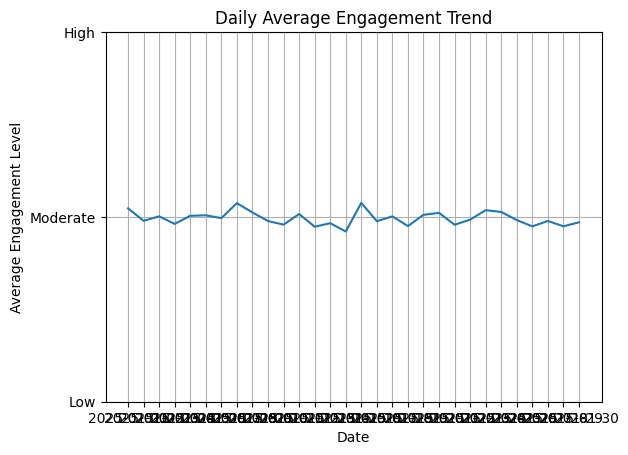

In [53]:
plt.plot(Calculate_average_Engagment["Date"], Calculate_average_Engagment['Engagment_Num'],linestyle="-", label="Average Engagement")
plt.title("Daily Average Engagement Trend")
plt.xlabel("Date")
plt.ylabel("Average Engagement Level")
plt.yticks([1, 2, 3], ["Low", "Moderate", "High"]) 
plt.grid(True)
plt.show()


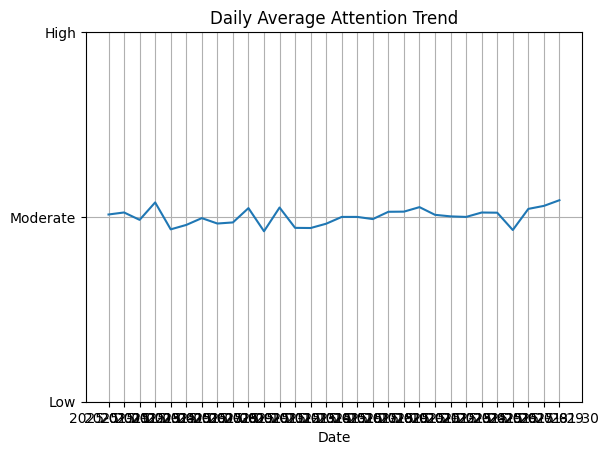

In [54]:
plt.plot(Calculate_average_Attention["Date"],Calculate_average_Attention['Attention_Num'], linestyle = "-",
         label = "Attention Engagment")
plt.title("Daily Average Attention Trend")
plt.xlabel("Date")
plt.yticks([1, 2, 3], ["Low", "Moderate", "High"]) 
plt.grid(True)
plt.show()

3. Most and Least Engaged Students
- Objective: Identify students who consistently perform well or poorly.
- Tools: pandas, numpy, matplotlib
- Tasks:



- Group by student_id and average engagement or attention.

In [55]:
Calculate_average = students_data.groupby('Student ID')[['Engagment_Num', 'Attention_Num']].mean().reset_index()
Calculate_average['Engagement_Level'] = Calculate_average['Engagment_Num'].round().map(Reverse_mapping)
Calculate_average['Attention_Level'] = Calculate_average['Attention_Num'].round().map(Reverse_mapping)
print(Calculate_average) 

      Student ID  Engagment_Num  Attention_Num Engagement_Level  \
0              1            3.0            3.0             High   
1              2            1.0            3.0              Low   
2              3            2.0            3.0         Moderate   
3              4            3.0            2.0             High   
4              5            3.0            3.0             High   
...          ...            ...            ...              ...   
9995        9996            3.0            3.0             High   
9996        9997            3.0            3.0             High   
9997        9998            1.0            1.0              Low   
9998        9999            2.0            2.0         Moderate   
9999       10000            2.0            1.0         Moderate   

     Attention_Level  
0               High  
1               High  
2               High  
3           Moderate  
4               High  
...              ...  
9995            High  
9996       

- Sort and display top/bottom 10 students using a bar chart

In [56]:
top10 = Calculate_average.head(10)
top10

,Student ID,Engagment_Num,Attention_Num,Engagement_Level,Attention_Level
0,1,3.0,3.0,High,High
1,2,1.0,3.0,Low,High
2,3,2.0,3.0,Moderate,High
3,4,3.0,2.0,High,Moderate
4,5,3.0,3.0,High,High
5,6,1.0,1.0,Low,Low
6,7,3.0,1.0,High,Low
7,8,3.0,2.0,High,Moderate
8,9,1.0,3.0,Low,High
9,10,2.0,2.0,Moderate,Moderate


In [57]:
bottom10 = Calculate_average.tail(10)
bottom10

,Student ID,Engagment_Num,Attention_Num,Engagement_Level,Attention_Level
9990,9991,1.0,2.0,Low,Moderate
9991,9992,2.0,2.0,Moderate,Moderate
9992,9993,2.0,2.0,Moderate,Moderate
9993,9994,3.0,2.0,High,Moderate
9994,9995,2.0,2.0,Moderate,Moderate
9995,9996,3.0,3.0,High,High
9996,9997,3.0,3.0,High,High
9997,9998,1.0,1.0,Low,Low
9998,9999,2.0,2.0,Moderate,Moderate
9999,10000,2.0,1.0,Moderate,Low


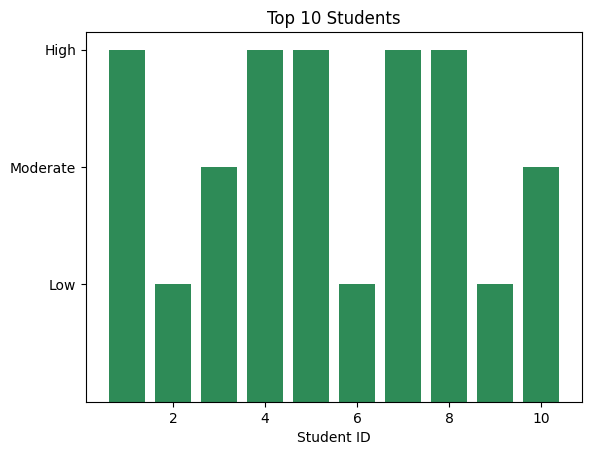

In [58]:
plt.bar(top10['Student ID'],top10['Engagment_Num'],color = "seagreen")
plt.title("Top 10 Students")
plt.xlabel("Student ID")
plt.yticks([1, 2, 3], ["Low", "Moderate", "High"]) 
plt.show()

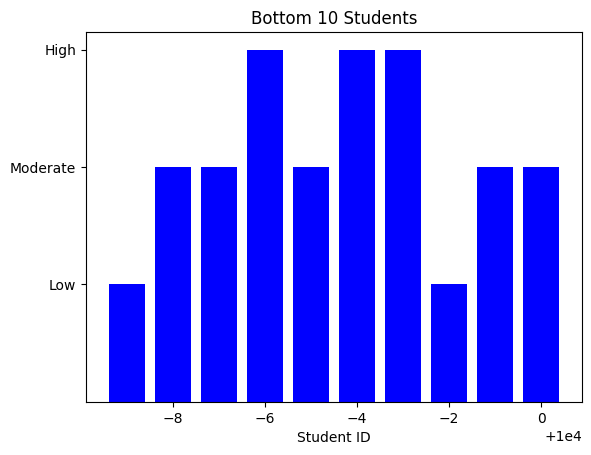

In [59]:
# plt.bar(bottom10['Student ID'],bottom10['Engagment_Num'],color = "blue")
plt.bar(bottom10['Student ID'], bottom10['Engagment_Num'], color="blue")
plt.title("Bottom 10 Students")
plt.xlabel("Student ID")
plt.yticks([1, 2, 3], ["Low", "Moderate", "High"]) 
plt.show()

# Behavioral Pattern Analysis
4. Engagement by Learning Mode
- Objective: Analyze which learning modes lead to higher engagement.
- Tools: pandas, matplotlib
- Tasks:


- Group by learning_mode and compute average engagement

In [60]:
avg = students_data.groupby("Learning Mode Prediction")['Engagment_Num'].mean().reset_index()
avg['Engagement_Level'] = avg['Engagment_Num'].round().map(Reverse_mapping)
avg

,Learning Mode Prediction,Engagment_Num,Engagement_Level
0,Auditory Learner,2.015334,Moderate
1,Kinesthetic Learner,1.977771,Moderate
2,Visual Learner,1.980303,Moderate


- Plot a bar chart to compare modes

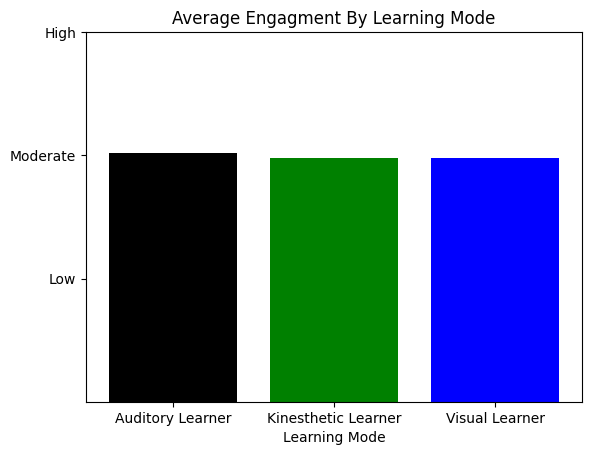

In [61]:
plt.bar(avg['Learning Mode Prediction'],avg['Engagment_Num'],color=["black","green","blue"])
plt.title("Average Engagment By Learning Mode")
plt.xlabel("Learning Mode")
plt.yticks([1, 2, 3], ["Low", "Moderate", "High"]) 
plt.show()